In [1]:
import pandas as pd
import numpy as np

tips = pd.read_csv('tips.csv') #tips is my dataframe
tips.head()#prints first 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
tips["sex"].unique() #value_counts

array(['Female', 'Male'], dtype=object)

In [3]:
tips["day"].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


Measures of Central Tendency


In [ ]:
#mean (best provided no outlier presence)

round(tips['tip'].mean(), 3)

<Axes: ylabel='tip'>

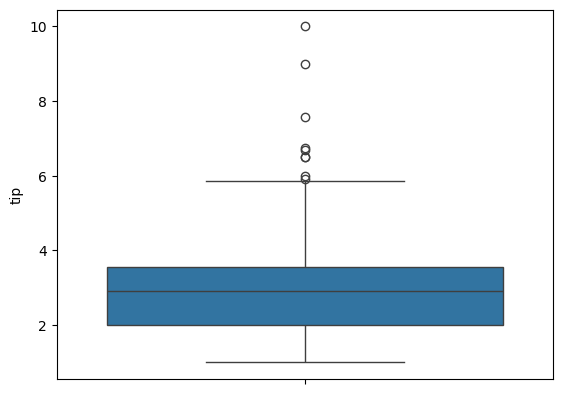

In [6]:
#box plot to detect outliers
import seaborn as sns
sns.boxplot(tips['tip'])

In [7]:
#median in skewed cases
tips['tip'].median()

2.9

In [10]:
#mode for categorical data
tips['sex'].value_counts()


,count
sex,
Male,157
Female,87


In [ ]:
tips["day"].mode()

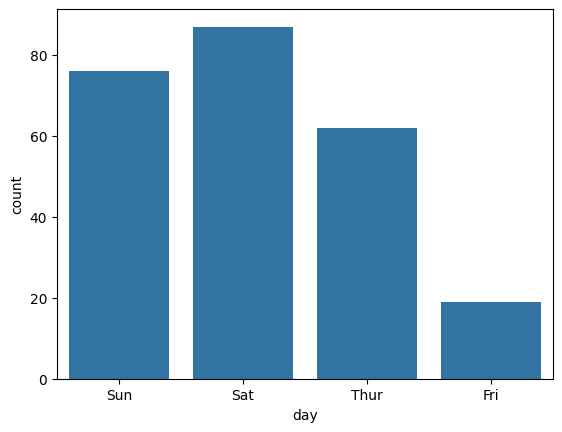

In [13]:
import matplotlib.pyplot as plt
sns.countplot(x=tips["day"])
plt.show()

In [14]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


Measures of Spread/Dispersion

In [15]:
#range: diff bw the max and mmin value
tips['tip'].max() - tips['tip'].min()

9.0

In [16]:
#variance
round(tips['tip'].var(),3)

1.914

In [17]:
#stdev
round(tips['tip'].std(),3)

1.384

In [18]:
tips['tip'].max()

10.0

In [19]:
tips['tip'].min()

1.0

In [24]:
name = "Nikkhil"
marks = 98

#marks of nikkhil in maths are 98 out of 100
print(f"marks of {name} in maths are {marks} out of 100")

marks of Nikkhil in maths are 98 out of 100


In [25]:
#quantile
q1,q2, q3= np.percentile(tips['tip'], [25 ,50,75])
iqr = q3 - q1

print(f'Q1: {q1}\nQ3: {q3}\nIQR: {iqr:.2f}')

Q1: 2.0
Q3: 3.5625
IQR: 1.56


In [ ]:
print("The q1 value is {1}, \nq2 is {0}, \nfollowed by iqr of {2}".format(q3,q1,iqr))

In [ ]:
print(f"The q1 value is {q1}, q3 is {q3}, followed by iqr of {iqr}")

**Inferential Statistics**

The standard error is an inferential statistics measurement to estimate the true population parameter given the sample statistic. The standard error information is how the sample statistic would vary if we repeat the experiment with the data samples from the same population.

The standard error of the mean (SEM) is the most commonly used type of standard error as it tells how well the mean would represent the population given the sample data.

In [26]:
#standard error
from scipy.stats import sem

round(sem(tips['tip']),3)

0.089

We often report SEM with the data mean where the true mean population would estimated to fall within the mean±SEM.

In [27]:
data_mean = round(tips['tip'].mean(),3)
data_sem = round(sem(tips['tip']),3)

print(f'The true population mean is estimated to fall within the range of {data_mean+data_sem} to {data_mean-data_sem}')

The true population mean is estimated to fall within the range of 3.087 to 2.9090000000000003


**Confidence interval**



Confidence interval is also used to estimate the true population parameter, but it introduces the confidence level. The confidence level estimates the true population parameters range with a certain confidence percentage.

In statistics, confidence can be described as a probability. For example, a confidence interval with a 90% confidence level means that the true mean population estimate would be within the confidence interval's upper and lower values 90 out of 100 times.

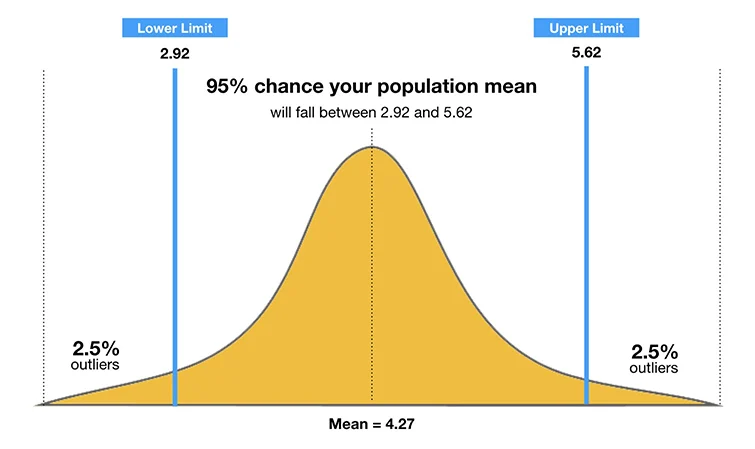

In [31]:
import scipy.stats as st

st.norm.interval(confidence=0.95, loc=data_mean, scale=data_sem)

(2.8235632053759354, 3.172436794624065)

The above result could be interpreted that our data true population mean falls between the range 2.82 to 3.17 with 95% confidence level.

Hypothesis Testing

To demonstrate a t-test in Python, we'll use the scipy.stats module to perform an independent two-sample t-test. This test is commonly used to determine if there is a significant difference between the means of two independent groups.

Here's a Python code example along with an interpretation of the results:



In [1]:
import numpy as np
from scipy.stats import ttest_ind

# Sample data: Two groups of sample data
group1 = np.array([20, 22, 19, 21, 20, 23])
group2 = np.array([28, 30, 29, 31, 27, 29])

# Performing the t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Output
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -9.800000000000002
P-value: 1.912309296901757e-06


Interpretation:

Null Hypothesis: there is no significant difference bw the means of grp 1 and grp 2

T-Statistic: The T-statistic value of -9.8 indicates the number of standard deviations the group means are apart. A large absolute value of the t-statistic (far from zero) suggests a significant difference between the two groups.

P-Value: The p-value of approximately 1.91 x 10^-6 is very small, much lower than the common significance level of 0.05. A small p-value indicates that the observed difference in means between group1 and group2 is highly unlikely to have occurred under the null hypothesis (which assumes no difference in means).

Based on these results, you can reject the null hypothesis and conclude that there is a statistically significant difference in the means of group1 and group2. This suggests that any observed difference in the means is not likely due to random chance.

**Chi Squared Test**

 a table that shows the number of men and women buying different types of pets.

 The aim of this chi-square test is to conclude whether the two variables( gender and choice of pet ) are related to each other not.

Null hypothesis: We start by defining our null hypothesis (H0) which states that there is no relation between the variables.

Alternate hypothesis: It would state that there is a significant relationship between the two variables.

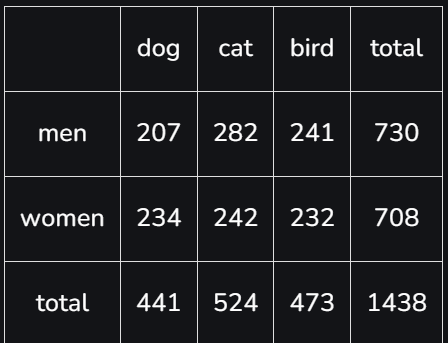

In [2]:
from scipy.stats import chi2_contingency

# defining the table
data = [[207, 282, 241], [234, 242, 232]]#list of lists
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))

if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')#fail to reject

print(stat)

p value is 0.1031971404730939
Independent (H0 holds true)
4.542228269825232


**ANOVA**

ANOVA (Analysis of Variance) is a statistical method used to test the difference between the means of more than two groups. To demonstrate how to perform ANOVA in Python, we'll use the scipy library. I'll create a sample dataset with three different groups and then perform a one-way ANOVA.

In [3]:
import numpy as np
from scipy.stats import f_oneway

# Example dataset: Sample data of three groups
group1 = np.array([20, 21, 19, 22, 24])
group2 = np.array([28, 32, 30, 29, 27])
group3 = np.array([18, 17, 20, 22, 19])

# Performing the one-way ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


F-Statistic: 37.83783783783786
P-Value: 6.5737433948595994e-06


In this code:

group1, group2, and group3 represent the sample data for three different groups.
f_oneway is the function from SciPy that computes the F-statistic and p-value for the one-way ANOVA test.
The null hypothesis for ANOVA is that all group means are equal. A low p-value (typically < 0.05) suggests you can reject the null hypothesis, indicating at least one group mean is different.

You can replace group1, group2, and group3 with your own data. Each array represents the data points for one group. For accurate results, ensure that the data meets the assumptions of ANOVA, including independence of samples, normal distribution within groups, and homogeneity of variances.

Implementing a **two-way ANOVA** in Python is a bit more involved than a one-way ANOVA, as it considers the effect of two independent variables on a dependent variable. This can also include the interaction effect between the independent variables. For this, we typically use the statsmodels library, which provides a comprehensive function for ANOVA.

Let's create a hypothetical dataset and perform a two-way ANOVA. Assume we have a dataset with two factors (e.g., FactorA and FactorB) and a response variable. Here's an example:

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example dataset
data = {
    'Response': [20, 21, 19, 22, 23, 24, 25, 19, 18, 17, 22, 23, 20, 21, 22, 18, 17, 16],
    'FactorA': ['A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A3', 'A3', 'A3', 'A3', 'A3', 'A3'],
    'FactorB': ['B1', 'B1', 'B1', 'B2', 'B2', 'B2', 'B1', 'B1', 'B1', 'B2', 'B2', 'B2', 'B1', 'B1', 'B1', 'B2', 'B2', 'B2']
}

df = pd.DataFrame(data)
df

,Response,FactorA,FactorB
0,20,A1,B1
1,21,A1,B1
2,19,A1,B1
3,22,A1,B2
4,23,A1,B2
5,24,A1,B2
6,25,A2,B1
7,19,A2,B1
8,18,A2,B1
9,17,A2,B2


In [5]:
# Ordinary Least Squares (OLS) model
model = ols('Response ~ C(FactorA) + C(FactorB) + C(FactorA):C(FactorB)', data=df).fit()

# Two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                          sum_sq    df         F    PR(>F)
C(FactorA)             19.444444   2.0  2.034884  0.173392
C(FactorB)              0.500000   1.0  0.104651  0.751886
C(FactorA):C(FactorB)  37.000000   2.0  3.872093  0.050402
Residual               57.333333  12.0       NaN       NaN


In this code:

Response is the dependent variable.

FactorA and FactorB are the two independent variables.

The ols function from statsmodels.formula.api is used to fit an ordinary least squares regression model.

anova_lm performs the ANOVA test. typ=2 specifies the type of sum of squares to be used, which is appropriate for a balanced design.

This will give you the F-statistics and p-values for each factor and their interaction, helping you determine if the factors have a significant effect on the response variable.

**Interpreting these results:**

The p-values for Factor A and Factor B are higher than a typical alpha level of 0.05, suggesting that neither Factor A nor Factor B have a statistically significant effect on the response variable individually.

However, the interaction between Factor A and Factor B has a p-value close to 0.05, indicating that there may be a statistically significant interaction effect between these two factors on the response variable.

It's important to note that the choice of alpha level for significance can vary based on the context and field of study. A p-value of 0.050402 is quite close to the commonly used threshold of 0.05.

This analysis suggests that while the individual factors might not significantly influence the response, their interaction could be significant.

**Choosing the Type**

Type I sum of squares are “sequential.”  In essence the factors are tested in the order they are listed in the model.



Type III sum of squares are “partial.”  In essence, every term in the model is tested in light of every other term in the model.  That means that main effects are tested in light of interaction terms as well as in light of other main effects.



Type II sum of squares are similar to Type III, except that they preserve the principle of marginality.  This means that main factors are tested in light of one another, but not in light of the interaction term.



When data are balanced and the design is simple, types I, II, and III will give the same results.  But readers should be aware that results may differ for unbalanced data or more complex designs.  The code below gives an example of this.